# IMPORTING NECESSARY LIBRARIES


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# DATA UPLOAD

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
sandal_label = 5
sneaker_label = 7

In [6]:
train_filter = (train_labels == sandal_label) | (train_labels == sneaker_label)
test_filter = (test_labels == sandal_label) | (test_labels == sneaker_label)

In [7]:
train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

In [8]:
train_labels = np.where(train_labels == sandal_label, 0, 1)
test_labels = np.where(test_labels == sandal_label, 0, 1)

# DATA PREPROCESSING

In [9]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Reshape images to include a channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# DATA VISUALIZATION & ANALYSIS

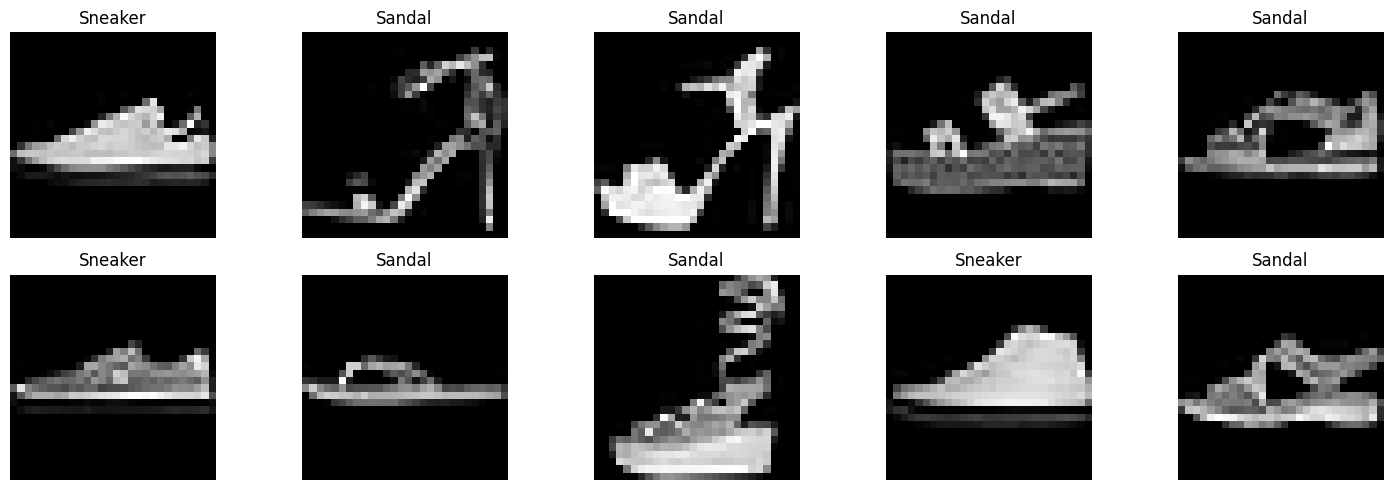

In [16]:
num_images_to_show = 10
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    plt.subplot(2, num_images_to_show // 2, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title("Sandal" if train_labels[i] == 0 else "Sneaker")
    plt.axis("off")
plt.tight_layout()
plt.show()

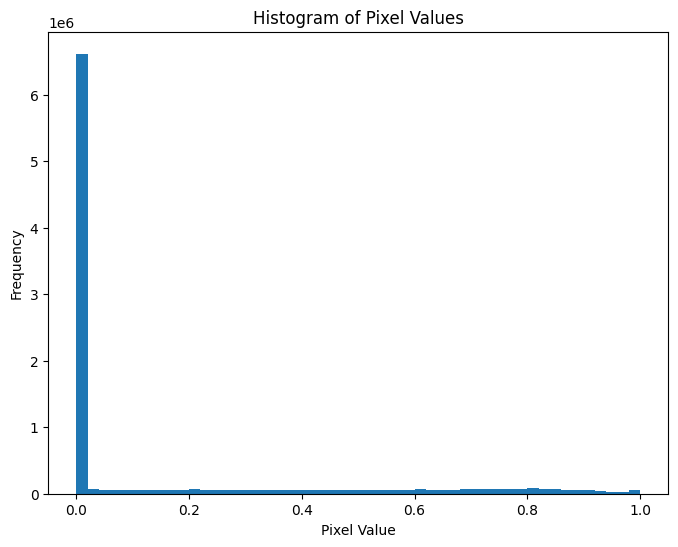

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(train_images.flatten(), bins=50)
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

<ipython-input-20-11031be56c39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette="pastel")


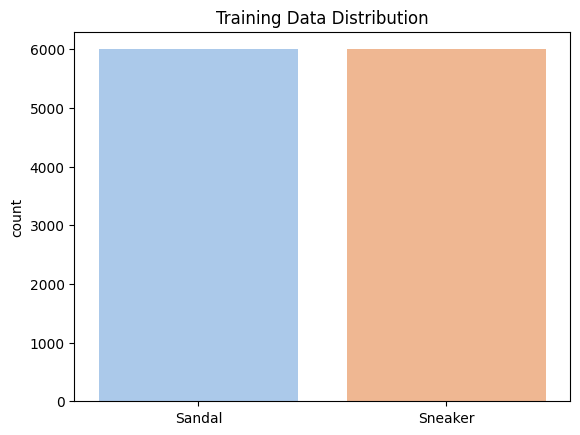

In [20]:
# Distribution of labels
sns.countplot(x=train_labels, palette="pastel")
plt.xticks(ticks=[0, 1], labels=["Sandal", "Sneaker"])
plt.title("Training Data Distribution")
plt.show()

# MODEL DEVELOPMENT & TRAINING

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Epoch 1/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1717 - accuracy: 0.9346 - val_loss: 0.1008 - val_accuracy: 0.9654
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0777 - accuracy: 0.9746 - val_loss: 0.0608 - val_accuracy: 0.9783
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0427 - val_accuracy: 0.9842
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.0339 - val_accuracy: 0.9900
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0361 - val_accuracy: 0.9871
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0260 - val_accuracy: 0.9900
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0389 - val_accuracy: 0.9858
Epoch 

# MODEL EVALUATION

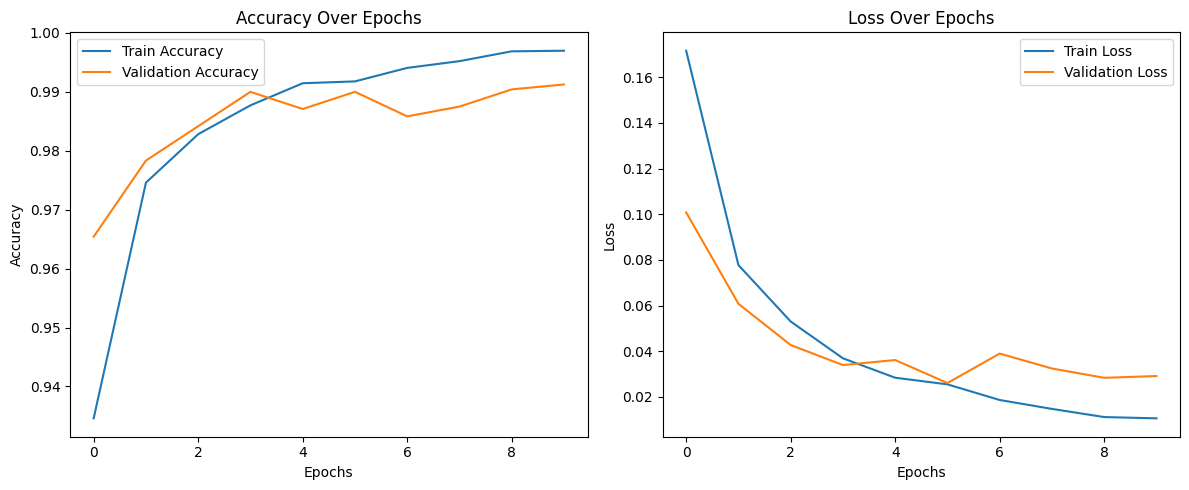

In [23]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9870
Test Accuracy: 98.70%


63/63 [==============================] - 0s 3ms/step


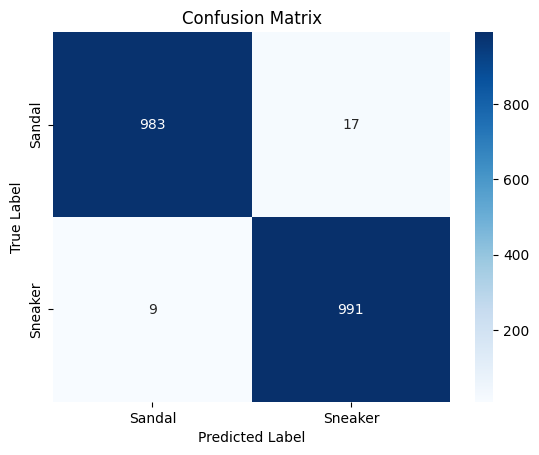

In [25]:
y_pred = (model.predict(test_images) > 0.5).astype("int32")
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Sandal", "Sneaker"], yticklabels=["Sandal", "Sneaker"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
print("Classification Report:\n", classification_report(test_labels, y_pred, target_names=["Sandal", "Sneaker"]))

Classification Report:
               precision    recall  f1-score   support

      Sandal       0.99      0.98      0.99      1000
     Sneaker       0.98      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

